In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2
import os
from os.path import isfile, join


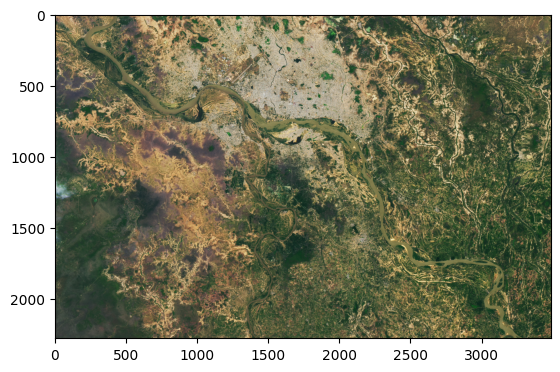

In [6]:
rgb_image=plt.imread("rgb.jpg")

plt.imshow(rgb_image)

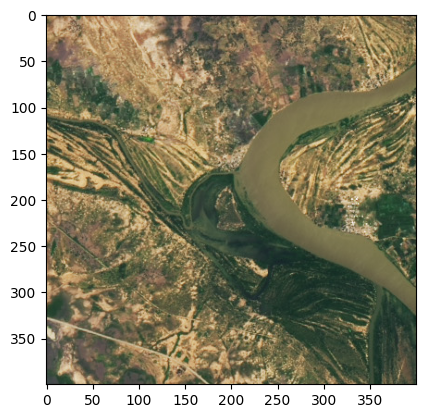

In [7]:
def cut_image(img,x,y,t1,t2):
    return img[x:t1+x,y:t2+y,:]

def save_image(img,name,format="png"):
    im = Image.fromarray(img)
    im.save(f"{name}."+format)


cutted_image=cut_image(rgb_image,0,0,400,400)

plt.imshow(cutted_image)
#save_image(cv2.cvtColor(cutted_image, cv2.COLOR_BGR2GRAY),"my_image","jpeg")


In [8]:
save_image(cutted_image,"my_image","png")
save_image(cutted_image,"my_image","jpeg")
save_image(cutted_image,"my_image","bmp")
save_image(cutted_image,"my_image","tiff")
save_image(cutted_image,"my_image","gif")

Taille image format png: 329.62 KB


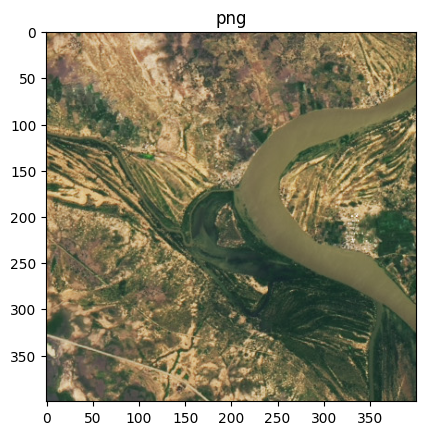

In [9]:

files = [f for f in os.listdir(".") if isfile(join(".", f)) and f.split(".")[0]=="my_image" ]

png_image=plt.imread(files[0])
plt.title(files[0].split(".")[1])
plt.imshow(png_image)
print("Taille image format png:", round(os.stat(files[0]).st_size/(1024),2),"KB")


Taille image format bmp: 468.8 KB


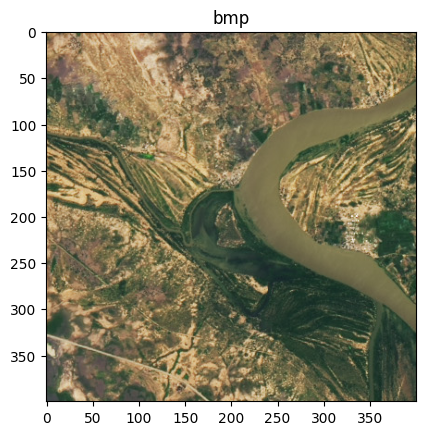

In [10]:
bmp_img=plt.imread(files[1])
plt.title(files[1].split(".")[1])
plt.imshow(bmp_img)
print("Taille image format bmp:", round(os.stat(files[1]).st_size/(1024),2),"KB")


Taille image format gif: 167.46 KB


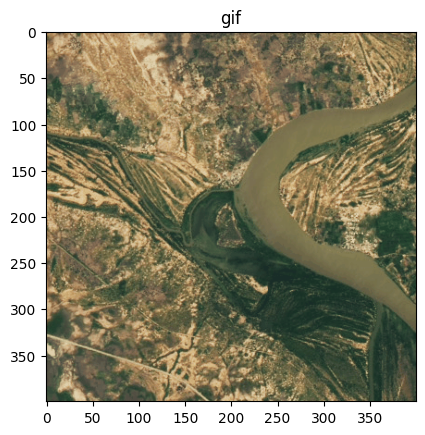

In [11]:
gif_img=plt.imread(files[2])
plt.title(files[2].split(".")[1])
plt.imshow(gif_img)
print("Taille image format gif:", round(os.stat(files[2]).st_size/(1024),2),"KB")
gif_img=gif_img[:,:,:3]


Taille image format tiff: 468.89 KB


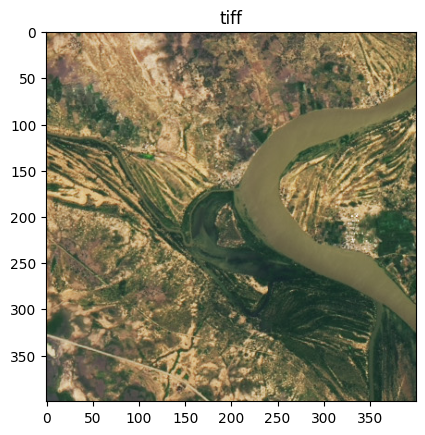

In [12]:
tiff_img=plt.imread(files[3])
plt.title(files[3].split(".")[1])
plt.imshow(tiff_img)
print("Taille image format tiff:", round(os.stat(files[3]).st_size/(1024),2),"KB")


Taille image format jpeg: 39.12 KB


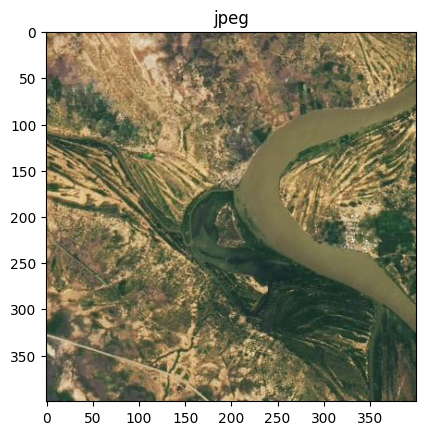

In [13]:
jpeg_img=plt.imread(files[4])
plt.title(files[4].split(".")[1])
plt.imshow(jpeg_img)
print("Taille image format jpeg:", round(os.stat(files[4]).st_size/(1024),2),"KB")


<ul>
<li>Taille image format png: 329.62 KB</li>
<li>Taille image format bmp: 468.8 KB</li>
<li>Taille image format gif: 167.46 KB</li>
<li>Taille image format tiff: 468.89 KB</li>
<li>Taille image format jpeg: 39.12 KB</li>

</ul>
<p>
We can see that the size of the bmp,tiff,png images are larger, but give us more quality as they are 
a lossless type of compression (tiff & png), as compered to jpeg and gif images, which are small in size
but have low image quality as they use  lossy compression.  </p>

<h3>Mean quared error:</h3>

In [14]:
def mean_squard_error(refrence,to_compare):
   return np.square(refrence-to_compare).mean()

print("mse(png,jpeg):",mean_squard_error(png_image*255,jpeg_img))  
print("mse(png,bmp):",mean_squard_error(png_image*255,bmp_img))  
print("mse(png,tiff):",mean_squard_error(png_image*255,tiff_img))  
print("mse(png,gif):",mean_squard_error(png_image*255,gif_img))  


mse(png,jpeg): 45.50909
mse(png,bmp): 0.0
mse(png,tiff): 0.0
mse(png,gif): 10.064442


By analysing the result of the mean squard error  applied to each image, it is clear that bmp and tiff images have 0 error as they use a lossless compression technique. In contrast, jpeg and gif images have errors with jpeg having more then  gif, as they lose some of the data of the original png image, as a result, there will be an error margin when comparing these images.

<h3>Histogram equalization</h3>
<p>In order to equalize the histogram we need to</p>
<ol>
<li>Calculate the histograme for the rgb component.</li>
<li>Calculate the probality density function for the compoent.</li>
<li>Calculate the cumulative density function  using the pdf. </li>
<li>Using this formula s=(1-L)cdf(x) to calculate the new linear pdf function. </li>
<li>Map each new value in the  </li>

</ol>

Text(0.5, 1.0, 'jpeg')

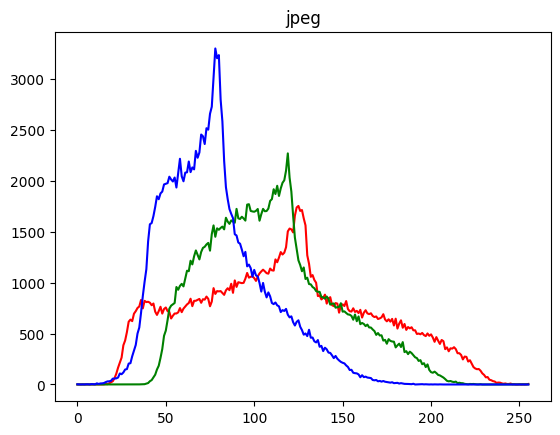

In [15]:
# function to split an image to it's rgb components
def rgb_components(img):
    img=img.copy()
    return img[:,:,0],img[:,:,1],img[:,:,2]

r_jpeg,g_jpeg,b_jpeg=rgb_components(jpeg_img)
#function to calculate the histograme of an image
def histo(img):
    return [np.count_nonzero(img==i) for i in range(256)]

r_histograme=histo(r_jpeg)
g_histograme=histo(g_jpeg)
b_histograme=histo(b_jpeg) 
plt.plot(np.arange(0,256,1),r_histograme,c="red")
plt.plot(np.arange(0,256,1),g_histograme,c="green")
plt.plot(np.arange(0,256,1),b_histograme,c="blue")
plt.title("jpeg")



In [16]:


n=r_jpeg.shape[0]
m=r_jpeg.shape[1]

def pdf(img,x):
    n=img.shape[0]*img.shape[1]
    counts=np.count_nonzero(img==x)
    return counts/n

values=np.arange(0,256,1)
probs=np.array([pdf(r_jpeg,i) for i in range(256)])
cdfs=np.array([cdf(i,probs) for i in range(256)])
plt.subplot(2,1,1)
plt.plot(values,probs)
plt.title("pdf")
plt.subplot(2,1,2)
plt.plot(values,cdfs)
plt.title("cdf")
def cdf(x,probs):
    return np.sum(probs[0:x])


def equa_pdf(x,probs):
    L=256
    return np.round((cdf(x,probs))*(L-1))
    


  

    

NameError: name 'cdf' is not defined

In [ ]:
arr=np.array([equa_pdf(i,probs) for i in range(0,256)])




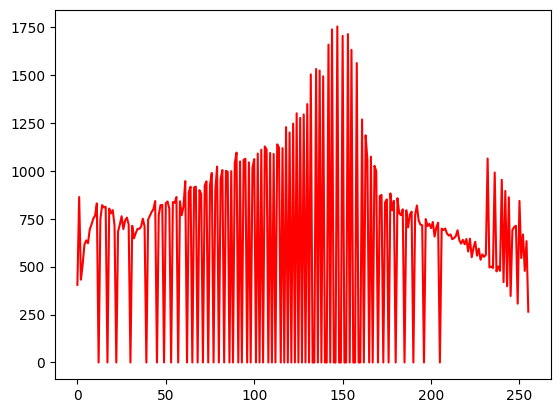

In [ ]:
r=r_jpeg.copy()
for i in range(n):
    for j in range(m):
        
        r[i][j]=int(arr[r_jpeg[i][j]])


r_histo=histo(r)

plt.plot(np.arange(0,256,1),r_histo,c="red")



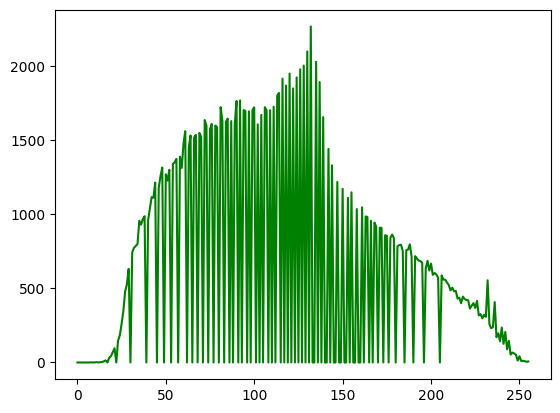

In [ ]:
g=g_jpeg.copy()
for i in range(n):
    for j in range(m):
        g[i][j]=int(arr[g_jpeg[i][j]])


g_histo=histo(g)

plt.plot(np.arange(0,256,1),g_histo,c="green")



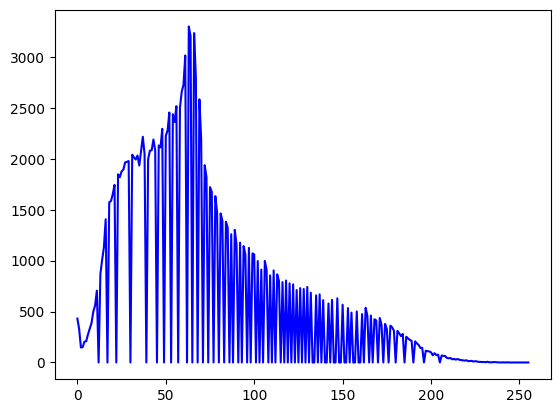

In [ ]:
b=b_jpeg.copy()
for i in range(n):
    for j in range(m):
        b[i][j]=int(arr[b_jpeg[i][j]])


b_histo=histo(b)

plt.plot(np.arange(0,256,1),b_histo,c="blue")



Text(0.5, 1.0, 'jpeg')

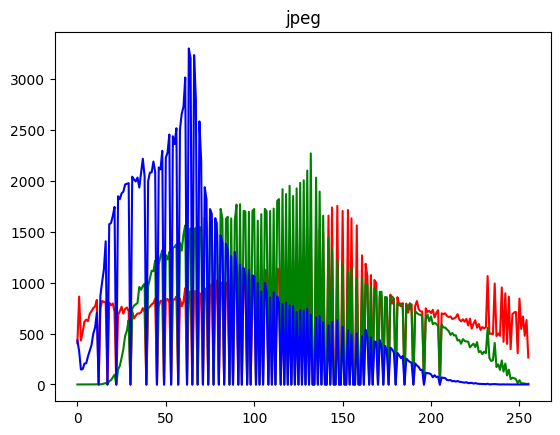

In [ ]:
img=np.dstack([r,g,b])


r_histograme=histo(r)
g_histograme=histo(g)
b_histograme=histo(b)
plt.plot(np.arange(0,256,1),r_histograme,c="red")
plt.plot(np.arange(0,256,1),g_histograme,c="green")
plt.plot(np.arange(0,256,1),b_histograme,c="blue")
plt.title("jpeg")


Text(0.5, 1.0, 'equalized image')

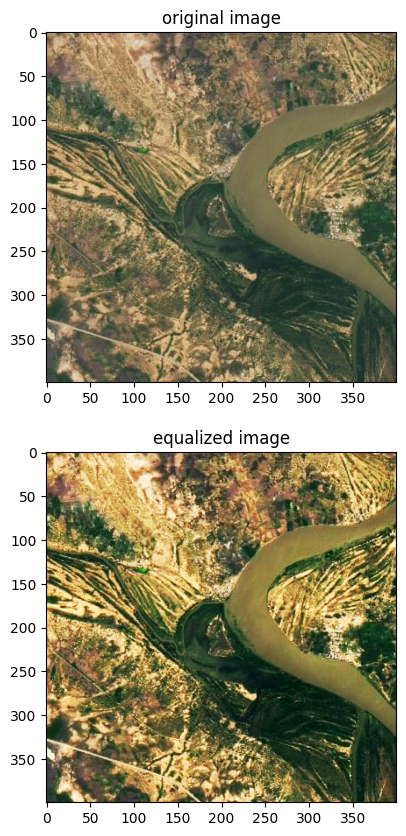

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.imshow(jpeg_img)
plt.title("original image")
plt.subplot(2,1,2)
plt.imshow(img)
plt.title("equalized image")


Text(0.5, 1.0, 'blue  equalized')

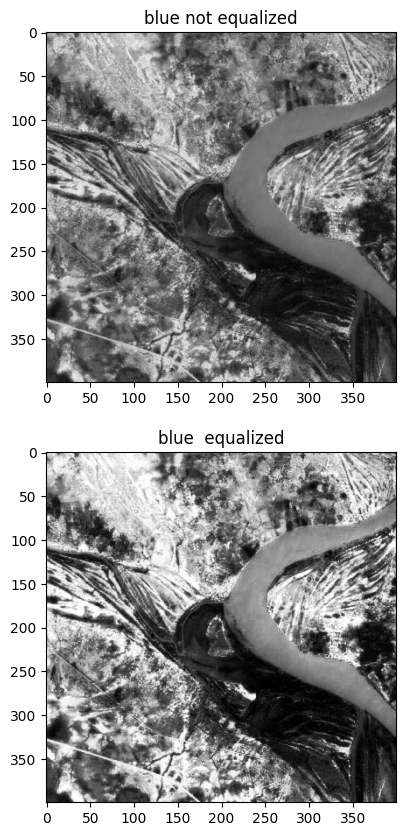

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(r_jpeg,cmap="gray")
plt.title("blue not equalized")
plt.subplot(2,1,2)
plt.imshow(r,cmap="gray")
plt.title("blue  equalized")

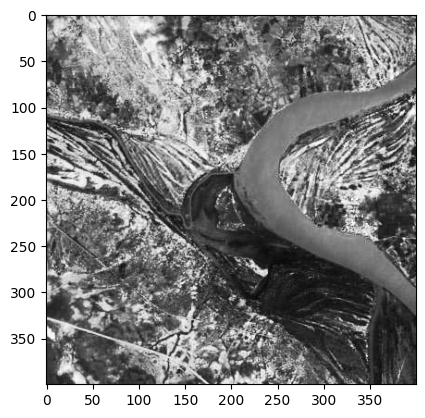

In [ ]:
plt.imshow(g,cmap="gray")

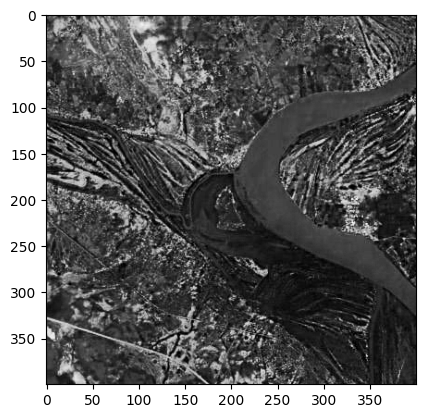

In [ ]:
plt.imshow(b,cmap="gray")

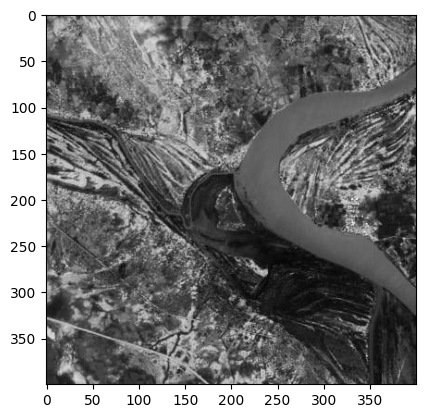

In [49]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

jpeg_gray=rgb2gray(jpeg_img)

plt.imshow(jpeg_gray,cmap="gray")

<h2>Linear filters</h2>
<h3>mean filter</h3>

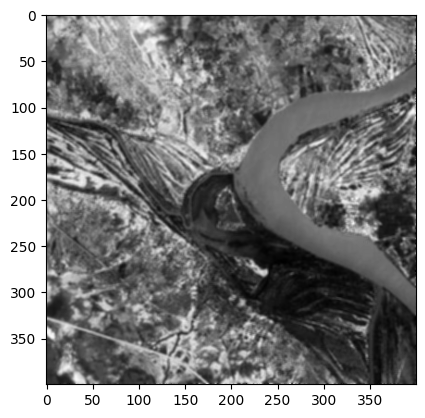

In [20]:
def mean_filter(img):
    n=img.shape[0]
    m=img.shape[1]
    a=img.copy()
    filter=np.ones((3,3))
    for x in range(1,n-1):
        for y in range(1,m-1):
            a[x][y]=np.mean(np.multiply(img[x-1:x+2,y-1:y+2],filter))
    return a

plt.imshow(mean_filter(jpeg_gray),cmap="gray")





<h3>Gaussien filter</h3>


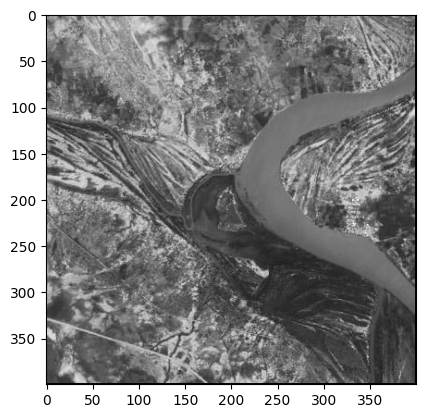

In [58]:
def gauss(x,y,sigma=0.01):
    return ((1)/(2*np.pi*sigma**2)*(np.exp(-(x**2+y**2)/(2*sigma**2))))


def gauss_filter(shape=(3,3)):
    a=np.ones(shape)
    for x in range(a.shape[0]):
        for y in range(a.shape[1]):
            a[x][y]=gauss(x,y,0.02)
    return a


def filter_img(img):
    n=img.shape[0]
    m=img.shape[1]
    a=img.copy()
    filter=gauss_filter()
    for x in range(1,n-1):
        for y in range(1,m-1):
            a[x][y]=np.mean(np.multiply(img[x-1:x+2,y-1:y+2],filter))
       
    return a

plt.imshow(filter_img(jpeg_gray),cmap="gray")  
            